# Lab 04_2: Two-qubit (CPW Resonator Bus Coupling)

### developed by Seong Hyeon Park (pajoheji0909@snu.ac.kr)

### Please find the attached homework at the end of this tutorial code

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from qiskit_metal import designs, MetalGUI, Dict

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [3]:
# set the overall layout size (X)
design.chips.main.size.size_x = '6mm'
# set the overall layout size (Y)
design.chips.main.size.size_y = '6mm'
# set the substrate thickness (Z)
design.chips.main.size.size_z = '-400um'

In [4]:
# start GUI
gui = MetalGUI(design)

In [5]:
hfss = design.renderers.hfss
# start ANSYS HFSS
hfss.start()

INFO 03:33PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:33PM [load_ansys_project]: 	Opened Ansys App
INFO 03:33PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 03:33PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/USER/Documents/Ansoft/
	Project:   Project3
INFO 03:33PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 03:33PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:33PM [connect]: 	Connected to project "Project3" and design "Design_q3d" 😀 



True

In [6]:
import pyEPR as epr
import qiskit_metal as metal

## design two qubits capacitively coupled to a CPW resonator

In [7]:
# for readout resonator (CPW)
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb_driven import LaunchpadWirebondDriven

# there are various in-built qubit types in Qiskit-Metal, you should try it by yourself
from qiskit_metal.qlibrary.qubits.transmon_pocket_6 import TransmonPocket6

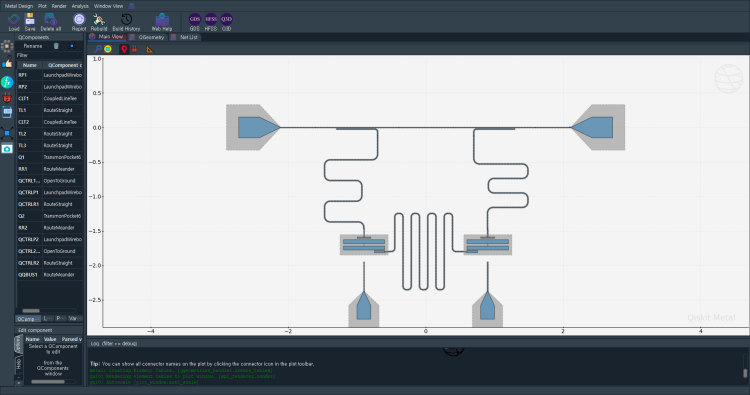

In [8]:
cpw_w = '10 um'; cpw_g = '6 um'

tr1_Ljj = '13nH' ; tr1_Cjj = '2fF'
res1_l = '3.5 mm'; res1_coup_l = '600 um'; res1_coup_g = '2um'

tr2_Ljj = '13.5nH' ; tr2_Cjj = '2fF'
res2_l = '3.6 mm'; res2_coup_l = '600 um'; res2_coup_g = '2um'

busres_l = '8.5 mm'

design.delete_all_components()

launch_options = dict(
    chip='main', 
    pos_x="-2.12 mm", 
    pos_y="0mm",  
    orientation='360', 
    lead_length='0um',
    pad_width='300um',
    pad_height='300um',
    pad_gap='180um',
    taper_height='300um'
)
RP1 = LaunchpadWirebondDriven(design, 'RP1', options = launch_options)

launch_options = dict(
    chip='main', 
    pos_x="2.12 mm", 
    pos_y="0mm",  
    orientation='180', 
    lead_length='30um',
    pad_width='300um',
    pad_height='300um',
    pad_gap='180um',
    taper_height='300um'
)
RP2 = LaunchpadWirebondDriven(design, 'RP2', options = launch_options)

clt_options = dict(
    chip='main', 
    pos_x="-1mm", 
    pos_y="0mm",
    prime_width=cpw_w,
    prime_gap=cpw_g,
    second_width=cpw_w,
    second_gap=cpw_g,
    coupling_space=res1_coup_g,
    coupling_length=res1_coup_l,
    down_length='100um',
    fillet='40um',
    mirror=False,
    open_termination=False,
    hfss_wire_bonds = False
)
CLT1 = CoupledLineTee(design, 'CLT1', options = clt_options)

route_options = Dict(hfss_wire_bonds = True,
                     pin_inputs=Dict(start_pin=Dict(component='RP1', pin='tie'),
                                     end_pin=Dict(component='CLT1',pin='prime_start')),
                     trace_width=cpw_w, trace_gap=cpw_g)
TL1 = RouteStraight(design, 'TL1', options=route_options)

clt_options = dict(
    chip='main', 
    pos_x="1mm", 
    pos_y="0mm",
    prime_width=cpw_w,
    prime_gap=cpw_g,
    second_width=cpw_w,
    second_gap=cpw_g,
    coupling_space=res1_coup_g,
    coupling_length=res1_coup_l,
    down_length='100um',
    fillet='40um',
    mirror=True,
    open_termination=False,
    hfss_wire_bonds = False
)
CLT2 = CoupledLineTee(design, 'CLT2', options = clt_options)

route_options = Dict(hfss_wire_bonds = True,
                     pin_inputs=Dict(start_pin=Dict(component='CLT1', pin='prime_end'),
                                     end_pin=Dict(component='CLT2',pin='prime_start')),
                     trace_width=cpw_w, trace_gap=cpw_g)
TL2 = RouteStraight(design, 'TL2', options=route_options)

route_options = Dict(hfss_wire_bonds = True,
                     pin_inputs=Dict(start_pin=Dict(component='CLT2', pin='prime_end'),
                                     end_pin=Dict(component='RP2',pin='tie')),
                     trace_width=cpw_w, trace_gap=cpw_g)
TL3 = RouteStraight(design, 'TL3', options=route_options)

tr_options = dict(pos_x="-0.9mm", pos_y="-1.7mm", orientation = 180,
                  pad_width = '600um', pad_height = '60um', pad_gap = '30um',
                  pocket_height = '300um', pocket_width = '700um', inductor_width = '10um',
                  connection_pads=dict(readout = dict(loc_W=0,loc_H=-1, 
                                                      pad_height='20um', pad_width='200um', pad_gap='20um', pad_shift='0um',
                                                      cpw_width=cpw_w, cpw_gap=cpw_g, cpw_extend='-120um',pad_cpw_extent='-120um'),
                                       qubus1 = dict(loc_W=-1,loc_H=+1, 
                                                     pad_height='30um', pad_width='150um', pad_gap='10um', pad_cpw_shift='10um', pad_shift='0um',
                                                     cpw_width=cpw_w, cpw_gap=cpw_g, cpw_extend='0 um')),
                  hfss_inductance = tr1_Ljj,
                  hfss_capacitance = tr1_Cjj
                 )
Q1 = TransmonPocket6(design, 'Q1', options = tr_options)

route_options = Dict(chip='main',
                     hfss_wire_bonds = True,
                     pin_inputs=Dict(start_pin=Dict(component='Q1',pin='readout'),
                                     end_pin=Dict(component='CLT1',pin='second_end')),
                     trace_width=cpw_w,
                     trace_gap=cpw_g,
                     total_length=res1_l,
                     fillet="80um",
                     meander = dict(spacing = '300um', asymmetry = '300um'),
                     lead = dict(start_straight = '100um', end_straight = '100 um'))
RR1 = RouteMeander(design, 'RR1', options=route_options)

qctrl1open = OpenToGround(design, 'QCTRL1OPEN', options=dict(pos_x='-0.9mm',  pos_y='-1.95mm', orientation='90'))

launch_options = dict(
    chip='main', 
    pos_x="-0.9mm", 
    pos_y="-2.38mm",  
    orientation='90', 
    lead_length='0um',
    pad_width='200um',
    pad_height='200um',
    pad_gap='120um',
    taper_height='200um'
)
QCTRLP1 = LaunchpadWirebondDriven(design, 'QCTRLP1', options = launch_options)

route_options = Dict(hfss_wire_bonds = True,
                     pin_inputs=Dict(start_pin=Dict(component='QCTRL1OPEN', pin='open'),
                                     end_pin=Dict(component='QCTRLP1',pin='tie')),
                     trace_width=cpw_w, trace_gap=cpw_g)
QCTRLR1 = RouteStraight(design, 'QCTRLR1', options=route_options)

tr_options = dict(pos_x="0.9mm", pos_y="-1.7mm", orientation = 180,
                  pad_width = '600um', pad_height = '60um', pad_gap = '30um',
                  pocket_height = '300um', pocket_width = '700um', inductor_width = '10um',
                  connection_pads=dict(readout = dict(loc_W=0,loc_H=-1, 
                                                      pad_height='20um', pad_width='200um', pad_gap='20um', pad_shift='0um',
                                                      cpw_width=cpw_w, cpw_gap=cpw_g, cpw_extend='-120um',pad_cpw_extent='-120um'),
                                       qubus2 = dict(loc_W=1,loc_H=+1, 
                                                     pad_height='30um', pad_width='150um', pad_gap='10um', pad_cpw_shift='10um', pad_shift='0um',
                                                     cpw_width=cpw_w, cpw_gap=cpw_g, cpw_extend='0 um')),
                  hfss_inductance = tr2_Ljj,
                  hfss_capacitance = tr2_Cjj
                 )
Q2 = TransmonPocket6(design, 'Q2', options = tr_options)

route_options = Dict(chip='main',
                     hfss_wire_bonds = True,
                     pin_inputs=Dict(start_pin=Dict(component='Q2',pin='readout'),
                                     end_pin=Dict(component='CLT2',pin='second_end')),
                     trace_width=cpw_w,
                     trace_gap=cpw_g,
                     total_length=res2_l,
                     fillet="80um",
                     meander = dict(spacing = '210um', asymmetry = '-300um'),
                     lead = dict(start_straight = '100um', end_straight = '100 um'))
RR2 = RouteMeander(design, 'RR2', options=route_options)

launch_options = dict(
    chip='main', 
    pos_x="0.9mm", 
    pos_y="-2.38mm",  
    orientation='90', 
    lead_length='0um',
    pad_width='200um',
    pad_height='200um',
    pad_gap='120um',
    taper_height='200um'
)
QCTRLP2 = LaunchpadWirebondDriven(design, 'QCTRLP2', options = launch_options)

qctrl2open = OpenToGround(design, 'QCTRL2OPEN', options=dict(pos_x='0.9mm',  pos_y='-1.95mm', orientation='90'))

route_options = Dict(hfss_wire_bonds = True,
                     pin_inputs=Dict(start_pin=Dict(component='QCTRL2OPEN', pin='open'),
                                     end_pin=Dict(component='QCTRLP2',pin='tie')),
                     trace_width=cpw_w, trace_gap=cpw_g)
QCTRLR2 = RouteStraight(design, 'QCTRLR2', options=route_options)

route_options = Dict(hfss_wire_bonds = False,
                     pin_inputs=Dict(start_pin=Dict(component='Q1', pin='qubus1'),
                                     end_pin=Dict(component='Q2',pin='qubus2')),
                     trace_width=cpw_w,
                     trace_gap=cpw_g,
                     total_length=busres_l,
                     fillet="50um",
                     meander = dict(spacing = '120um', asymmetry = '0um'),
                     lead = dict(start_straight = '100um', end_straight = '10 um'))
QQBUS1 = RouteMeander(design, 'QQBUS1', options=route_options)

gui.rebuild()
gui.autoscale()

# take a screenshot of the GUI
gui.screenshot()

## draw selected components only for simplicity
* Transmon qubits and coupler bus

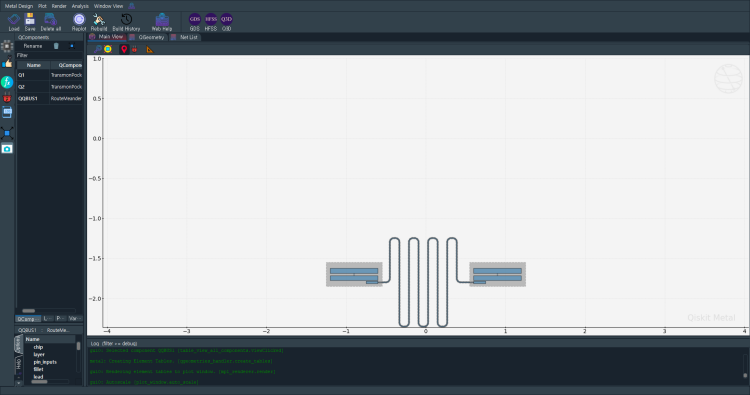

In [9]:
cpw_w = '10 um'; cpw_g = '6 um'

tr1_Ljj = '13nH' ; tr1_Cjj = '2fF'
res1_l = '3.5 mm'; res1_coup_l = '600 um'; res1_coup_g = '2um'

tr2_Ljj = '13.5nH' ; tr2_Cjj = '2fF'
res2_l = '3.6 mm'; res2_coup_l = '600 um'; res2_coup_g = '2um'

busres_l = '8.5 mm'

design.delete_all_components()

tr_options = dict(pos_x="-0.9mm", pos_y="-1.7mm", orientation = 180,
                  pad_width = '600um', pad_height = '60um', pad_gap = '30um',
                  pocket_height = '300um', pocket_width = '700um', inductor_width = '10um',
                  connection_pads=dict(qubus1 = dict(loc_W=-1,loc_H=+1, 
                                                     pad_height='30um', pad_width='150um', pad_gap='10um', pad_cpw_shift='10um', pad_shift='0um',
                                                     cpw_width=cpw_w, cpw_gap=cpw_g, cpw_extend='0 um')),
                  hfss_inductance = tr1_Ljj,
                  hfss_capacitance = tr1_Cjj
                 )
Q1 = TransmonPocket6(design, 'Q1', options = tr_options)

tr_options = dict(pos_x="0.9mm", pos_y="-1.7mm", orientation = 180,
                  pad_width = '600um', pad_height = '60um', pad_gap = '30um',
                  pocket_height = '300um', pocket_width = '700um', inductor_width = '10um',
                  connection_pads=dict(qubus2 = dict(loc_W=1,loc_H=+1, 
                                                     pad_height='30um', pad_width='150um', pad_gap='10um', pad_cpw_shift='10um', pad_shift='0um',
                                                     cpw_width=cpw_w, cpw_gap=cpw_g, cpw_extend='0 um')),
                  hfss_inductance = tr2_Ljj,
                  hfss_capacitance = tr2_Cjj
                 )
Q2 = TransmonPocket6(design, 'Q2', options = tr_options)

route_options = Dict(hfss_wire_bonds = False,
                     pin_inputs=Dict(start_pin=Dict(component='Q1', pin='qubus1'),
                                     end_pin=Dict(component='Q2',pin='qubus2')),
                     trace_width=cpw_w,
                     trace_gap=cpw_g,
                     total_length=busres_l,
                     fillet="50um",
                     meander = dict(spacing = '120um', asymmetry = '0um'),
                     lead = dict(start_straight = '100um', end_straight = '10 um'))
QQBUS1 = RouteMeander(design, 'QQBUS1', options=route_options)

gui.rebuild()
gui.autoscale()

# take a screenshot of the GUI
gui.screenshot()

# method (1): Energy Participation Ratio (EPR)

In [10]:
from qiskit_metal.analyses.quantization import EPRanalysis

# project name
proj_name = "lab04_two_qubits_cpwbus"

eig_s = EPRanalysis(design, "hfss")
hfss = eig_s.sim.renderer

try:
    hfss.start()
except:
    hfss.activate_design(proj_name)

INFO 03:33PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:33PM [load_ansys_project]: 	Opened Ansys App
INFO 03:33PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 03:33PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/USER/Documents/Ansoft/
	Project:   Project3
INFO 03:33PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 03:33PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:33PM [connect]: 	Connected to project "Project3" and design "Design_q3d" 😀 



In [11]:
from qiskit_metal.analyses.quantization import EPRanalysis

# define the EPR analysis class
eig_s = EPRanalysis(design, "hfss")

# define the renderer program for the eigenmode simulation
hfss = eig_s.sim.renderer

# try-except to avoid common(?) error during the HFSS rendering
try:
    hfss.start()
except:
    hfss.activate_design(proj_name)

# NOTE: you should define the junction in HFSS
eig_s.setup.junctions.jj1.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_s.setup.junctions.jj1.line = 'JJ_Lj_Q1_rect_jj_'

eig_s.setup.junctions.jj2.rect = 'JJ_rect_Lj_Q2_rect_jj'
eig_s.setup.junctions.jj2.line = 'JJ_Lj_Q2_rect_jj_'

# define the setup
em_s = eig_s.sim.setup
em_s.name = "setup_custom"

# minimum searching frequency
em_s.min_freq = 3

# target eigenmode number
# NOTE: now you have two components... you should find 'three' eigenmodes (two for qubits and one for CPW bus)
em_s.n_modes = 3

# maximum pass number
em_s.max_passes = 15

# criteria for eigenmode simulation convergence: maximum delta F_eigen between passes < value
em_s.max_delta_f = 0.5

# simulation minimum converged passes 
em_s.min_converged = 2

# simulation order 0: point, 1: line, 2: face
em_s.basis_order = 1

# Design variables can also be added in for direct simulation sweeps. Here, we have to set the junction inductance and capacitance
em_s.vars = Dict({'Lj1': tr1_Ljj, 'Cj1': tr1_Cjj,
                  'Lj2': tr2_Ljj, 'Cj2': tr2_Cjj})


INFO 03:33PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:33PM [load_ansys_project]: 	Opened Ansys App
INFO 03:33PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 03:33PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/USER/Documents/Ansoft/
	Project:   Project3
INFO 03:33PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 03:33PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:33PM [connect]: 	Connected to project "Project3" and design "Design_q3d" 😀 



In [12]:
eig_s.sim._render(name=proj_name,                # design name
                  selection = [],                # if None --> all
                  solution_type='eigenmode',     # NOTE: case sensitive
                  vars_to_initialize=em_s.vars,  # set variables
                  open_pins=[],                  # set open pins
                  port_list=[],                  # set ports, for eigenmode simulations --> R = 50 Ohm boundary conditions 
                  box_plus_buffer = True)        # if False --> set the overall layout as you defined above. If True --> set marginal chip sizes as you set here.

INFO 03:34PM [connect_design]: 	Opened active design
	Design:    lab04_two_qubits_cpwbus_hfss [Solution type: Eigenmode]
WARNING 03:34PM [connect_setup]: 	No design setup detected.
WARNING 03:34PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


'lab04_two_qubits_cpwbus_hfss'

In [13]:
# mesh setting name, components, maximum mesh length
hfss.modeler.mesh_length('qubitpad_mesh_setting', 
                         ['pad_bot_Q1', 'pad_top_Q1',
                          'pad_bot_Q2', 'pad_top_Q2'], 
                         MaxLength='0.1 mm')

hfss.modeler.mesh_length('cpw_mesh_setting', 
                         ['trace_QQBUS1', 'qubus1_connector_pad_Q1', 'qubus1_wire_Q1', 'qubus2_connector_pad_Q2', 'qubus2_wire_Q2'], 
                         MaxLength='0.05 mm')

In [14]:
eig_s.sim._analyze()

INFO 03:34PM [get_setup]: 	Opened setup `setup_custom`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:34PM [analyze]: Analyzing setup setup_custom
03:40PM 18s INFO [get_f_convergence]: Saved convergences to c:\Users\USER\Documents\GitHub\sqc_lecture_notes\tutorials\hfss_eig_f_convergence.csv


In [15]:
pinfo = hfss.pinfo
pinfo.junctions['jj1'] = {'rect':'JJ_rect_Lj_Q1_rect_jj', 'line':'JJ_Lj_Q1_rect_jj_',
                         'Lj_variable':'Lj1', 'Cj_variable':'Cj1'}

pinfo.junctions['jj2'] = {'rect':'JJ_rect_Lj_Q2_rect_jj', 'line':'JJ_Lj_Q2_rect_jj_',
                         'Lj_variable':'Lj2', 'Cj_variable':'Cj2'}

pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied

In [16]:
eprd = epr.DistributedAnalysis(pinfo)
eprd.do_EPR_analysis()

Design "lab04_two_qubits_cpwbus_hfss" info:
	# eigenmodes    3
	# variations    1

Variation 0  [1/1]

  Mode 0 at 4.85 GHz   [1/3]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.3%  1.298e-24 8.717e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.64%
	jj1             0.00074595  (+)        1.80179e-05
		Energy fraction (Lj over Lj&Cj)= 97.55%
	jj2              1.01719  (+)        0.0255145
		(U_tot_cap-U_tot_ind)/mean=0.04%

  Mode 1 at 4.95 GHz   [2/3]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.3%  2.069e-24 1.435e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.55%
	jj1              1.0

(WindowsPath('C:/data-pyEPR/Project3/lab04_two_qubits_cpwbus_hfss/2025-02-17 15-40-30.npz'),
 ['0'])

In [17]:
epra = epr.QuantumAnalysis(eprd.data_filename)
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 10)

WARNING 03:40PM [__init__]: <p>Error: <class 'IndexError'></p>


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Using taylor expansion
Starting the diagonalization
Finished the diagonalization
(3, 2)
Multiple junctions -- assuming transmons/harmonics oscillators only
Pm_norm=
modes
0    1.000862
1    1.000632
2    0.994961
dtype: float64

Pm_norm idx =
     jj1    jj2
0  False   True
1   True  False
2  False  False
*** P (participation matrix, not normlz.)
        jj1       jj2
0  0.000727  0.991867
1  0.991790  0.000817
2  0.001894  0.001686

*** S (sign-bit matrix)
   s_jj1  s_jj2
0     -1      1
1      1      1
2      1     -1
*** P (participation matrix, normalized.)
   0.00073     0.99
      0.99  0.00082
    0.0019   0.0017

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       239    0.746     1.12
     0.746      239     1.24
      1.12     1.24  0.00292

*** Chi matrix ND (MHz) 
       275  -0.0616    0.879
   -0.0616      274

OrderedDict([('0',
              OrderedDict([('f_0', 0    4850.986522
                            1    4945.007504
                            2    6701.205428
                            Name: 0, dtype: float64),
                           ('f_1',
                            0    4610.639960
                            1    4704.594722
                            2    6700.020657
                            dtype: float64),
                           ('f_ND',
                            0    4596.805135
                            1    4691.061669
                            2    6700.107501
                            dtype: float64),
                           ('chi_O1',
                                        0           1         2
                            0  239.411201    0.746176  1.124545
                            1    0.746176  239.420115  1.239157
                            2    1.124545    1.239157  0.002919),
                           ('chi_ND',
                    

# Method (2): Capacitance Analysis and LOM derivation using the analysis package

In [18]:
import scqubits as scq

from scipy.constants import speed_of_light as c_light
from qiskit_metal.analyses.quantization import LOManalysis
from qiskit_metal.analyses.quantization.lumped_capacitive import load_q3d_capacitance_matrix
from qiskit_metal.analyses.quantization.lom_core_analysis import CompositeSystem, Cell, Subsystem, QuantumSystemRegistry
c1 = LOManalysis(design, "q3d")

03:42PM 23s INFO [__init__]: TransmonBuilder with system_type TRANSMON registered to QuantumSystemRegistry
03:42PM 23s INFO [__init__]: FluxoniumBuilder with system_type FLUXONIUM registered to QuantumSystemRegistry
03:42PM 23s INFO [__init__]: TLResonatorBuilder with system_type TL_RESONATOR registered to QuantumSystemRegistry
03:42PM 23s INFO [__init__]: LumpedResonatorBuilder with system_type LUMPED_RESONATOR registered to QuantumSystemRegistry


In [19]:
# example: update single setting
c1.sim.setup.max_passes = 30
c1.sim.setup.freq_ghz = 5

# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5,
 'save_fields': False,
 'enabled': True,
 'max_passes': 30,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [20]:
# you should define the open terminations, where coupling structures of a qubit end
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'qubus1')])

# c1.setup.run <- direct access
c1.sim.print_run_args()

q1_cmatrix = c1.sim.capacitance_matrix

# you should define the open terminations, where coupling structures of a qubit end
c1.sim.run(components=['Q2'], open_terminations=[('Q2', 'qubus2')])

# c1.setup.run <- direct access
c1.sim.print_run_args()

q2_cmatrix = c1.sim.capacitance_matrix

INFO 03:42PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:42PM [load_ansys_project]: 	Opened Ansys App
INFO 03:42PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 03:42PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/USER/Documents/Ansoft/
	Project:   Project3
INFO 03:42PM [connect_design]: 	Opened active design
	Design:    lab04_two_qubits_cpwbus_hfss [Solution type: Eigenmode]
INFO 03:42PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:42PM [connect]: 	Connected to project "Project3" and design "lab04_two_qubits_cpwbus_hfss" 😀 

INFO 03:42PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 03:42PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:42PM [analyze]: Analyzing setup Setup
INFO 03:42PM [get_matrix]: Exporting matrix data to (C:\Users\USER\AppData\Local\Temp\tmprmk0grtj.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH",

This analysis object run with the following kwargs:
{'name': None, 'components': ['Q1'], 'open_terminations': [('Q1', 'qubus1')], 'box_plus_buffer': True}



INFO 03:42PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:42PM [analyze]: Analyzing setup Setup
INFO 03:43PM [get_matrix]: Exporting matrix data to (C:\Users\USER\AppData\Local\Temp\tmp2m4s_otn.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 03:43PM [get_matrix]: Exporting matrix data to (C:\Users\USER\AppData\Local\Temp\tmptlz_3lxw.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 03:43PM [get_matrix]: Exporting matrix data to (C:\Users\USER\AppData\Local\Temp\tmp_18gw1ox.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 03:43PM [get_matrix]: Exporting matrix data to (C:\Users\USER\AppData\Local\Temp\tmp9pts016p.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 03:43PM [get_matrix]: Exporting matrix data to (C:\Users\USER\AppData\Loca

This analysis object run with the following kwargs:
{'name': None, 'components': ['Q2'], 'open_terminations': [('Q2', 'qubus2')], 'box_plus_buffer': True}



In [23]:
# cell 1: transmon 1

opt1 = dict(cap_mat = q1_cmatrix,
            ind_dict = {('pad_top_Q1', 'pad_bot_Q1'):13},  # junction inductance in nH
            jj_dict = {('pad_top_Q1', 'pad_bot_Q1'):'j1'},
            cj_dict = {('pad_top_Q1', 'pad_bot_Q1'):2},    # junction capacitance in fF
            )
cell_1 = Cell(opt1)

# cell 2: transmon 2
opt2 = dict(cap_mat = q2_cmatrix,
            ind_dict = {('pad_top_Q2', 'pad_bot_Q2'): 13.5}, # junction inductance in nH
            jj_dict = {('pad_top_Q2', 'pad_bot_Q2'):'j2'},
            cj_dict = {('pad_top_Q2', 'pad_bot_Q2'):2},      # junction capacitance in fF
            )
cell_2 = Cell(opt2)

In [24]:
# subsystem 1: transmon qubit Q1
transmon_Q1 = Subsystem(name='Q1', sys_type='TRANSMON', nodes=['j1'])

# subsystem 2: transmon qubit Q2
transmon_Q2 = Subsystem(name='Q2', sys_type='TRANSMON', nodes=['j2'])

# subsystem 3: bus resonator RR1
q_opts = dict(f_res = 6.70,           # bus dressed frequency in GHz
              Z0 = 50,                # characteristic impedance in Ohm
              vp = 0.404314 * c_light # phase velocity 
              )
res_BUS = Subsystem(name='res_BUS', sys_type='TL_RESONATOR', nodes=['qubus1_connector_pad_Q1', 'qubus2_connector_pad_Q2'], q_opts=q_opts)

In [25]:
composite_sys = CompositeSystem(subsystems=[transmon_Q1, transmon_Q2, res_BUS], 
                                cells=[cell_1, cell_2], 
                                grd_node='ground_main_plane',
                                nodes_force_keep=['qubus1_connector_pad_Q1', 'qubus2_connector_pad_Q2']
                                )

In [26]:
cg = composite_sys.circuitGraph()
print(cg)

node_jj_basis:
-------------

['j1', 'pad_bot_Q1', 'j2', 'pad_bot_Q2', 'qubus1_connector_pad_Q1', 'qubus2_connector_pad_Q2']

nodes_keep:
-------------

['j1', 'j2', 'qubus1_connector_pad_Q1', 'qubus2_connector_pad_Q2']


L_inv_k (reduced inverse inductance matrix):
-------------

                               j1        j2  qubus1_connector_pad_Q1  \
j1                       0.076923  0.000000                      0.0   
j2                       0.000000  0.074074                      0.0   
qubus1_connector_pad_Q1  0.000000  0.000000                      0.0   
qubus2_connector_pad_Q2  0.000000  0.000000                      0.0   

                         qubus2_connector_pad_Q2  
j1                                           0.0  
j2                                           0.0  
qubus1_connector_pad_Q1                      0.0  
qubus2_connector_pad_Q2                      0.0  

C_k (reduced capacitance matrix):
-------------

                                j1         j2  qubus

In [27]:
hilbertspace = composite_sys.create_hilbertspace()
print(hilbertspace)

HilbertSpace:  subsystems
-------------------------

Transmon------------| [Transmon_1]
                    | EJ: 12573.962523598551
                    | EC: 262.2647660360525
                    | ng: 0.001
                    | ncut: 22
                    | truncated_dim: 10
                    |
                    | dim: 45


Transmon------------| [Transmon_2]
                    | EJ: 12108.260207909718
                    | EC: 262.38120203875434
                    | ng: 0.001
                    | ncut: 22
                    | truncated_dim: 10
                    |
                    | dim: 45


Oscillator----------| [Oscillator_1]
                    | E_osc: 6700.0
                    | l_osc: None
                    | truncated_dim: 3
                    |
                    | dim: 3




In [28]:
hilbertspace = composite_sys.add_interaction()
hilbertspace.hamiltonian()

Quantum object: dims = [[10, 10, 3], [10, 10, 3]], shape = (300, 300), type = oper, isherm = True
Qobj data =
[[-19728.2017092 +0.00000000e+00j      0.        -1.34819453e-01j
       0.        +0.00000000e+00j ...      0.        +0.00000000e+00j
       0.        +0.00000000e+00j      0.        +0.00000000e+00j]
 [     0.        +1.34819453e-01j -13028.2017092 +0.00000000e+00j
       0.        -1.90663498e-01j ...      0.        +0.00000000e+00j
       0.        +0.00000000e+00j      0.        +0.00000000e+00j]
 [     0.        +0.00000000e+00j      0.        +1.90663498e-01j
   -6328.2017092 +0.00000000e+00j ...      0.        +0.00000000e+00j
       0.        +0.00000000e+00j      0.        +0.00000000e+00j]
 ...
 [     0.        +0.00000000e+00j      0.        +0.00000000e+00j
       0.        +0.00000000e+00j ...  53940.07412134+0.00000000e+00j
       0.        -6.53470594e+02j      0.        +0.00000000e+00j]
 [     0.        +0.00000000e+00j      0.        +0.00000000e+00j
       

In [29]:
hamiltonian_results = composite_sys.hamiltonian_results(hilbertspace, evals_count=30)


system frequencies in GHz:
--------------------------
{'Q1': 4.855262825655136, 'Q2': 4.7598876912574, 'res_BUS': 6.704595092504429}

Chi matrices in MHz
--------------------------
                 Q1          Q2   res_BUS
Q1      -301.739293    0.121560 -1.068645
Q2         0.121560 -302.650252 -0.968595
res_BUS   -1.068645   -0.968595  2.689070


In [30]:
composite_sys.compute_gs()

                                j1         j2  qubus1_connector_pad_Q1  \
j1                        0.000000   0.000000                67.475075   
j2                        0.000000   0.000000                 0.000000   
qubus1_connector_pad_Q1  67.475075   0.000000                 0.000000   
qubus2_connector_pad_Q2   0.000000  67.344707                 0.000000   

                         qubus2_connector_pad_Q2  
j1                                      0.000000  
j2                                     67.344707  
qubus1_connector_pad_Q1                 0.000000  
qubus2_connector_pad_Q2                 0.000000  

## Analytic expressions to calculate $\nu_{ZZ}$ between qubits

The full Hamiltonian to model the two-qubit, capacitively coupled to a bus resonator, can be expressed as follows

$\mathcal{H}=\sum_{q=1}^{2}[\omega_q a^\dagger_q a_q + \alpha_q a^\dagger_q a_q(a^\dagger_q a_q-1)]+\omega_r c^\dagger c + \sum_{q=1}^{2}g_{q,r}(a^\dagger_qc+a_qc^\dagger),$

where $\omega_q, \omega_r, g_{q,r}$ are the qubit frequency, bus resonator frequency, and coupling strength between a qubit and a bus resonator.
Note that $a, c$ are the annihilation operators and $a^\dagger, c^\dagger$ are creation operators, respectively.

The effective coupling ($J$) between qubits can be derived as 

$J = \frac{g_{1r}g_{2r}(\omega_1+\omega_2-2\omega_r)}{2(\omega_1-\omega_r)(\omega_2-\omega_r)}$,

and the ZZ coupling ($\nu_{ZZ}$) between qubits can be calculated as 

$\nu_{ZZ}=-\frac{2J^2(\alpha_1+\alpha_2)}{(\Delta_{12}+\alpha_1)(\Delta_{12}+\alpha_2)},$

where $\Delta_{12}=\omega_{1}-\omega_2$ is detuning frequency between qubits.

Reference: E Magesan and JM Gambetta, "Effective Hamiltonian models of the crossresonance gate," *Phys. Rev. A,* **101**, 052308 (2020) DOI: https://doi.org/10.1103/PhysRevA.101.052308

In [31]:
from qutip import qeye, destroy, tensor

import numpy as np
import matplotlib.pyplot as plt

In [32]:
# circuit parameters, unit: Hz
fQ1 = 4.855*1e9
fQ2 = 4.759*1e9
fbus = 6.704*1e9

alpha1 = -301.7*1e6
alpha2 = -302.5*1e6
g1 = 67.3*1e6
g2 = 67.3*1e6

In [33]:
# detuning frequency
delta12 = fQ1 - fQ2

# effective coupling
J = g1*g2*(fQ1+fQ2-2*fbus)/(2*(fQ1-fbus)*(fQ2-fbus))

nu_ZZ = -2*J**2*(alpha1+alpha2)/((delta12+alpha1)*(delta12+alpha2))

print(f'The effective coupling J: {J/1e6:.3F} MHz and the ZZ coupling: {nu_ZZ/1e3:.3F} kHz')

The effective coupling J: -2.389 MHz and the ZZ coupling: 162.382 kHz


From the definition of the ZZ coupling ($\nu_{ZZ}$), we can calculate $\nu_{ZZ}$ by numerically diagonalizing the Hamiltonian as 

$\nu_{ZZ} = \tilde{\omega}_{11} + \tilde{\omega}_{00} - \tilde{\omega}_{10} - \tilde{\omega}_{01},$

where $\tilde{\omega}_{ij}$ is the dressed state frequency (eigenfrequency) when qubit 1 is in $i$ state and qubit 2 is in $j$ state.

In [ ]:
# circuit parameters, unit: Hz
fQ1 = 4.855*1e9
fQ2 = 4.759*1e9
fbus = 6.704*1e9

alpha1 = -301.7*1e6
alpha2 = -302.5*1e6
g1 = 67.3*1e6
g2 = 67.3*1e6

In [ ]:
# Hamiltonian with h=1 assumption
# order number
N = 3

# qubit annihilation oeprators
a1 = tensor(destroy(N), qeye(N), qeye(N))
a2 = tensor(qeye(N), destroy(N), qeye(N))
# resonator annihilation operators
br = tensor(qeye(N), qeye(N), destroy(N))

# Hamiltonian
H0 = (fQ1*a1.dag()*a1 + alpha1/2*a1.dag()*a1*(a1.dag()*a1-1) +
      fQ2*a2.dag()*a2 + alpha2/2*a2.dag()*a2*(a2.dag()*a2-1) +
      fbus*br.dag()*br + 
      g1*(br*a1.dag()+br.dag()*a1) + g2*(br*a2.dag()+br.dag()*a2))

# unitary diagonalization and dressed state frequency
H0diag = np.sort(np.linalg.eigh(H0)[0])
eigfreqs = []
for j in range(len(H0diag)):
      eigfreqs.append(H0diag[j]-H0diag[0])

# f_110 - f_010 - f_100 + f_000 
with np.printoptions(precision=3, suppress=True):
      print(f'H_diag: {np.array(eigfreqs)},\n\nVzz (numerical): {(eigfreqs[6]+eigfreqs[0]-eigfreqs[1]-eigfreqs[2])/1e3:.3F} kHz')

# LAB HOMEWORK

### Directly coupled transmon qubit system simulations. You should achieve the target parameters within 5\%. The overall circuit layout, electric field distributions, simulations settings in ANSYS (including $L_J, C_J$ values), and the convergence plot vs. adaptive pass should be attached to the report.

1. Sweep $L_{J1}$ and $L_{J2}$ for two qubits. Calculate $\omega_{q1}/2\pi, \omega_{q2}/2\pi$, and $\chi_{12}/2\pi$. If possible, compare the results using the analytic equations.
2. Sweep the length of a bus resonator. Calculate $\omega_{q1}/2\pi, \omega_{q2}/2\pi, \omega_{\mathrm{bus}}/2\pi$, and $\chi_{12}/2\pi$. If possible, compare the results using the analytic equations.
2. Design two qubits, coupled via a CPW resonator bus, to have $\omega_{q1}/2\pi=4.5$ GHz, $\omega_{q2}/2\pi=5$ GHz, and $\chi_{12}/2\pi<30$ kHz from the `EPR` method. You have to modify the geometric features of a transmon qubit, a bus resonator, and a Josephson junction.
3. Design two qubits, coupled via a CPW resonator bus, to have $\omega_{q1}/2\pi=4.5$ GHz, $\omega_{q2}/2\pi=5$ GHz, and $\chi_{12}/2\pi<30$ kHz from the `new LOM` method. You have to modify the geometric features of a transmon qubit, a bus resonator, and a Josephson junction.